# 1  
Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (`alpha`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов? 

In [2]:
# для начала импортируем необходимые библиотеки, обозначим Х и У,
#напишем функцию ошибки mse,скопируем исследуемый алгоритм
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

n = X.shape[0]
alpha = 1e-3
w = np.array([1, 0.5])

for i in range(1001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [1.1102 0.84  ] 3173.15
100 [ 7.43515582 10.71754582] 899.5990444359252
200 [11.44993589 10.49282195] 735.5540619653672
300 [14.98921624  9.8634316 ] 606.0048772266812
400 [18.17511588  9.27626113] 500.7989288428639
500 [21.04606457  8.74617136] 415.355423398327
600 [23.63334499  8.26841272] 345.9620646005472
700 [25.96499229  7.83785632] 289.6039104863001
800 [28.06626432  7.44984037] 243.83236130353217
900 [29.95992301  7.10016181] 206.65877484533297
1000 [31.66648131  6.78503276] 176.46806566379882


1 напишем фунцию градиент с параметрами n и альфа, данная функция будет возвращать минимальное значение mse

In [19]:
def gradient(itaracii , alpha):
    
    n = X.shape[0]
    w = np.array([1, 0.5])
    err = []
    for i in range(itaracii):
        y_pred = np.dot(w, X.T)
        err.append(calc_mse(y, y_pred))
        for j in range(w.shape[0]):
            w[j] -= alpha * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    
    return(min(err)) 

In [30]:
#проверим функцию
itaracii = 1001
alpha = 1e-3
print(gradient(itaracii,alpha))


176.46806566379882


теперь создадим список itaracii от 2000 до 6000 с шагом 3 и постоим график зависимоти количиство итераций от минимальной ошибки

Text(0, 0.5, 'колличество итераций')

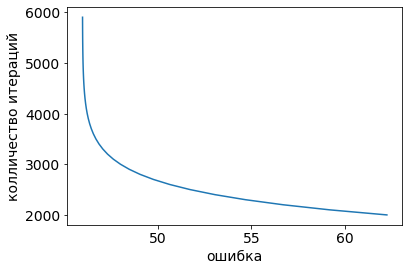

In [49]:
itaracii = list(range(2000,6000,100))
err = [gradient(el,alpha) for el in itaracii]
plt.plot(err, itaracii)
plt.xlabel('ошибка')
plt.ylabel('колличество итераций')

из графика выше следует что чем больше итераций тем меньше mse при постоянной alpha, а также график зависимости стремиться к какомуто значению mse

далее проделаем те же самые действия но с alpha при постоянном колличестве итераций

Text(0, 0.5, 'скорость обучения')

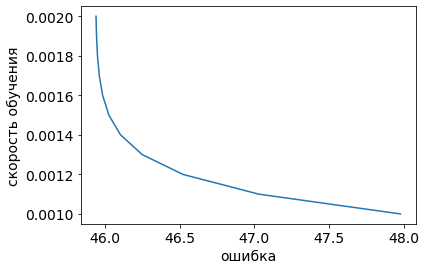

In [94]:
alpha = [1e-3,11e-4,12e-4,13e-4,14e-4,15e-4,16e-4,17e-4,18e-4,19e-4,2e-3]
err = [gradient(3000, el) for el in alpha]
plt.plot(err, alpha)
plt.xlabel('ошибка')
plt.ylabel('скорость обучения')

In [ ]:
мы молучам туже самую зависимость alpha от mse  что и кол-во итераций от mse,
далее попробуем одновременно увелитить и количество итераций и скорость обучения

Text(0, 0.5, 'увеличение alpha и itaracii')

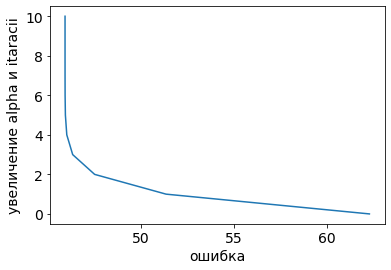

In [113]:
alpha = [1e-3,11e-4,12e-4,13e-4,14e-4,15e-4,16e-4,17e-4,18e-4,19e-4,2e-3]
itaracii = [2000,2300,2600,2900,3200,3500,3800,4100,4500,4800,5100 ]
err = [gradient(itaracii[el],alpha[el]) for el in range(len(alpha))]
plt.plot(err, list(range(len(alpha))))
plt.xlabel('ошибка')
plt.ylabel('увеличение alpha и itaracii')

на 7 пункте mse стабилизировалось значение itaracii = 4100 alpha = 17e-4

основываясь донным графика попробуем вручную подобрать параметры

In [111]:
print(gradient(4000,5e-3))

45.93749999999998


## Вывод
если увеличиваем скорость обучения то нужно увеличивать и колиличество итераций алгоритма градиентного спуска, увеличивать параметры необходимо до того момента пока разница между ошибками не будет удовлетворять заданной точности.

Для ускорения процесса вычисления весов мы сожем воспользоваться знаниями из второго урока, а из первого урока можно сделать вывод что изменение количества итераций замедляет работу алгоритма а альфа никак не влияет на время работы алгоритма

## 2
В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [20]:
w = np.array([1, 0.5])
alpha = 1e-2
for i in range(1001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= alpha * (1/n * 2 * np.dot((y_pred - y), X)) # ошибка!
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001842
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219864


## 3

Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога.

Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере  diff=10−6 , а значение  𝛼=10−2 ?

In [29]:
diff = 1e-6
alpha = 1e-2
w = np.array([1, 0.5])

i = 0
old_err = 0

while True:
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
    i +=1
    if abs(err - old_err) < diff:
        print(f'количество итераций = {i}\nошибка mse = {err}')
        break
    else:
        old_err = err

количество итераций = 810
ошибка mse = 45.937547277798465
